In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)


In [2]:
df1 = pd.read_csv('../Datasets/HousePriceAtUSA.csv')
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df1.city.unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [4]:
len(df1.city.unique())

44

In [5]:
df1.street.unique()

array(['18810 Densmore Ave N', '709 W Blaine St',
       '26206-26214 143rd Ave SE', ..., '759 Ilwaco Pl NE',
       '5148 S Creston St', '18717 SE 258th St'], dtype=object)

In [6]:
len(df1.street.unique())

4525

In [7]:
df1.groupby('city')['street'].agg('count')

city
Algona                    5
Auburn                  176
Beaux Arts Village        1
Bellevue                286
Black Diamond             9
Bothell                  33
Burien                   74
Carnation                22
Clyde Hill               11
Covington                43
Des Moines               58
Duvall                   42
Enumclaw                 28
Fall City                11
Federal Way             148
Inglewood-Finn Hill       1
Issaquah                187
Kenmore                  66
Kent                    185
Kirkland                187
Lake Forest Park         36
Maple Valley             96
Medina                   11
Mercer Island            86
Milton                    2
Newcastle                33
Normandy Park            18
North Bend               50
Pacific                   6
Preston                   2
Ravensdale                7
Redmond                 235
Renton                  293
Sammamish               175
SeaTac                   29
Seattle        

In [8]:
df1.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA


In [9]:
df1.columns.to_list()

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country']

In [10]:
df1.shape

(4600, 18)

In [11]:
df2 = df1.drop(['date','street','statezip','country','waterfront','yr_built','yr_renovated'],axis='columns')
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,0,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,4,5,3370,280,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1000,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,800,Redmond


### basement = 0 or 1 if basement_sqf>1
### add the sqfeet only if nessasary 

In [12]:
df2.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
sqft_above       0
sqft_basement    0
city             0
dtype: int64

In [13]:
def basement_conversion(sqft):
    return 1 if sqft>=1 else 0

In [14]:
df2['basement'] = df2['sqft_basement'].apply(basement_conversion)
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,city,basement
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,0,Shoreline,0
1,2384000.0,5.0,2.50,3650,9050,2.0,4,5,3370,280,Seattle,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,0,Kent,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1000,Bellevue,1
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,800,Redmond,1


In [15]:
df3 = df2.drop(['sqft_basement'],axis='columns')
df3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,city,basement
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,Shoreline,0
1,2384000.0,5.0,2.50,3650,9050,2.0,4,5,3370,Seattle,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,Kent,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,Bellevue,1
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,Redmond,1


In [16]:
def floor_conversion(number):
    # Get the integer and decimal parts
    integer_part = int(number)
    decimal_part = number - integer_part
    
    # Round based on the decimal part
    if decimal_part > 0.4:
        return integer_part + 1
    else:
        return integer_part

In [17]:
df3['floors'] = df3['floors'].apply(floor_conversion)
df3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,city,basement
0,313000.0,3.0,1.50,1340,7912,2,0,3,1340,Shoreline,0
1,2384000.0,5.0,2.50,3650,9050,2,4,5,3370,Seattle,1
2,342000.0,3.0,2.00,1930,11947,1,0,4,1930,Kent,0
3,420000.0,3.0,2.25,2000,8030,1,0,4,1000,Bellevue,1
4,550000.0,4.0,2.50,1940,10500,1,0,4,1140,Redmond,1


In [18]:
df3['bathrooms'] =  df3['bathrooms'].apply(floor_conversion)
df3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,city,basement
0,313000.0,3.0,2,1340,7912,2,0,3,1340,Shoreline,0
1,2384000.0,5.0,3,3650,9050,2,4,5,3370,Seattle,1
2,342000.0,3.0,2,1930,11947,1,0,4,1930,Kent,0
3,420000.0,3.0,2,2000,8030,1,0,4,1000,Bellevue,1
4,550000.0,4.0,3,1940,10500,1,0,4,1140,Redmond,1


In [19]:
df3.groupby('city')['city'].agg('count')

city
Algona                    5
Auburn                  176
Beaux Arts Village        1
Bellevue                286
Black Diamond             9
Bothell                  33
Burien                   74
Carnation                22
Clyde Hill               11
Covington                43
Des Moines               58
Duvall                   42
Enumclaw                 28
Fall City                11
Federal Way             148
Inglewood-Finn Hill       1
Issaquah                187
Kenmore                  66
Kent                    185
Kirkland                187
Lake Forest Park         36
Maple Valley             96
Medina                   11
Mercer Island            86
Milton                    2
Newcastle                33
Normandy Park            18
North Bend               50
Pacific                   6
Preston                   2
Ravensdale                7
Redmond                 235
Renton                  293
Sammamish               175
SeaTac                   29
Seattle        

In [20]:
#df3.location = df5.location.apply(lambda x: x.strip())
loc_stats = df3['city'].value_counts(ascending=False)
loc_stats

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [21]:
len(loc_stats[loc_stats<=200])

40

In [22]:
df4 = df3.copy()
df4['tot_sqft'] = df4['sqft_above'] + df4['sqft_living'] + df4['sqft_lot']
df4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,city,basement,tot_sqft
0,313000.0,3.0,2,1340,7912,2,0,3,1340,Shoreline,0,10592
1,2384000.0,5.0,3,3650,9050,2,4,5,3370,Seattle,1,16070
2,342000.0,3.0,2,1930,11947,1,0,4,1930,Kent,0,15807
3,420000.0,3.0,2,2000,8030,1,0,4,1000,Bellevue,1,11030
4,550000.0,4.0,3,1940,10500,1,0,4,1140,Redmond,1,13580


In [23]:
df5 = df4.drop(['sqft_above','sqft_lot','sqft_living'],axis='columns')
df5.head()

,price,bedrooms,bathrooms,floors,view,condition,city,basement,tot_sqft
0,313000.0,3.0,2,2,0,3,Shoreline,0,10592
1,2384000.0,5.0,3,2,4,5,Seattle,1,16070
2,342000.0,3.0,2,1,0,4,Kent,0,15807
3,420000.0,3.0,2,1,0,4,Bellevue,1,11030
4,550000.0,4.0,3,1,0,4,Redmond,1,13580


In [24]:
df5.tot_sqft.describe()

count    4.600000e+03
mean     1.881913e+04
std      3.631484e+04
min      2.013000e+03
25%      8.690750e+03
50%      1.139200e+04
75%      1.554525e+04
max      1.079238e+06
Name: tot_sqft, dtype: float64

In [25]:
df5.shape

(4600, 9)

In [26]:
df6 = df5.copy()
df6['price_per_sqft'] = df6['price']/df6['tot_sqft']
df6.head()

,price,bedrooms,bathrooms,floors,view,condition,city,basement,tot_sqft,price_per_sqft
0,313000.0,3.0,2,2,0,3,Shoreline,0,10592,29.550604
1,2384000.0,5.0,3,2,4,5,Seattle,1,16070,148.350965
2,342000.0,3.0,2,1,0,4,Kent,0,15807,21.635984
3,420000.0,3.0,2,1,0,4,Bellevue,1,11030,38.077969
4,550000.0,4.0,3,1,0,4,Redmond,1,13580,40.500736


In [27]:
def remove_prpesq_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('city'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [28]:
df6.shape

(4600, 10)

In [29]:
df7 = remove_prpesq_outliers(df6)
df7.head()

,price,bedrooms,bathrooms,floors,view,condition,city,basement,tot_sqft,price_per_sqft
0,230000.0,3.0,1,1,0,4,Algona,0,18780,12.247071
1,248000.0,4.0,3,2,0,3,Algona,0,10209,24.292291
2,196440.0,3.0,2,1,0,3,Algona,0,10472,18.758594
3,367500.0,4.0,3,2,0,3,Auburn,0,13451,27.321389
4,331950.0,4.0,3,2,2,3,Auburn,1,14473,22.935812


In [30]:
df7.shape

(3431, 10)

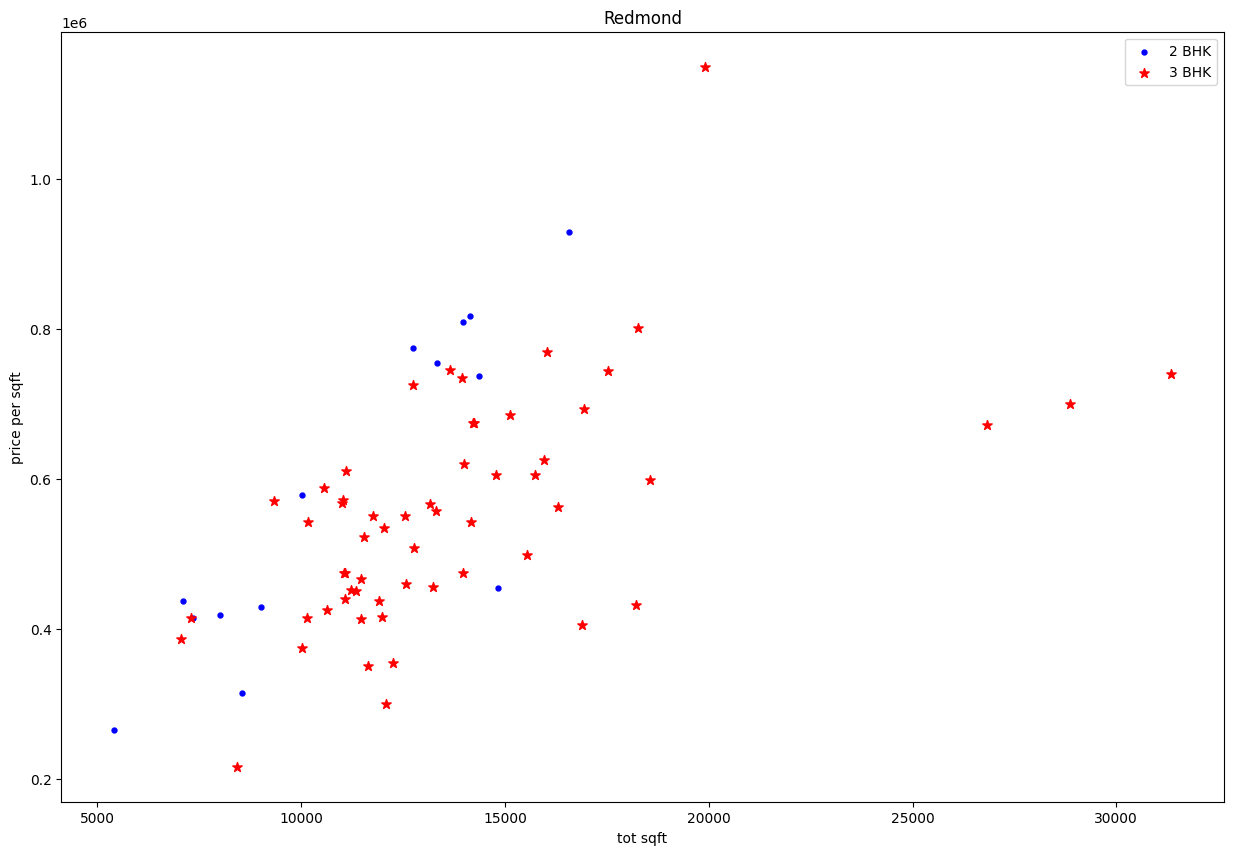

In [31]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.city == location) & (df.bedrooms == 2)]
    bhk3 = df[(df.city == location) & (df.bedrooms == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.tot_sqft,bhk2.price,color = 'blue',label ="2 BHK", marker ="." ,s =50)
    plt.scatter(bhk3.tot_sqft,bhk3.price,color = 'red',label ="3 BHK", marker ="*" ,s =50)
    plt.xlabel("tot sqft")
    plt.ylabel("price per sqft")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7,"Redmond")

In [32]:
df7.shape

(3431, 10)

In [33]:
def remove_bhk_outliers(df):
    exclude_indeces = np.array([])
    for location ,location_df in df.groupby('city'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indeces = np.append(exclude_indeces,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indeces,axis = 'index')

In [34]:
temp = remove_bhk_outliers(df7)
temp.shape

(2201, 10)

In [35]:
temp

,price,bedrooms,bathrooms,floors,view,condition,city,basement,tot_sqft,price_per_sqft
0,230000.0,3.0,1,1,0,4,Algona,0,18780,12.247071
1,248000.0,4.0,3,2,0,3,Algona,0,10209,24.292291
2,196440.0,3.0,2,1,0,3,Algona,0,10472,18.758594
3,367500.0,4.0,3,2,0,3,Auburn,0,13451,27.321389
4,331950.0,4.0,3,2,2,3,Auburn,1,14473,22.935812
...,...,...,...,...,...,...,...,...,...,...
3425,557125.0,4.0,3,2,0,3,Woodinville,0,19187,29.036587
3426,278900.0,3.0,1,1,0,3,Woodinville,0,11778,23.679742
3428,1895000.0,5.0,2,2,0,4,Yarrow Point,0,22912,82.707751
3429,1901000.0,3.0,3,2,2,3,Yarrow Point,0,18687,101.728474


In [36]:
df7[df7.bathrooms>df7.bedrooms+2]

,price,bedrooms,bathrooms,floors,view,condition,city,basement,tot_sqft,price_per_sqft


In [37]:
df8 = df7.drop('price_per_sqft',axis='columns')
df8

,price,bedrooms,bathrooms,floors,view,condition,city,basement,tot_sqft
0,230000.0,3.0,1,1,0,4,Algona,0,18780
1,248000.0,4.0,3,2,0,3,Algona,0,10209
2,196440.0,3.0,2,1,0,3,Algona,0,10472
3,367500.0,4.0,3,2,0,3,Auburn,0,13451
4,331950.0,4.0,3,2,2,3,Auburn,1,14473
...,...,...,...,...,...,...,...,...,...
3426,278900.0,3.0,1,1,0,3,Woodinville,0,11778
3427,405125.0,4.0,3,2,0,4,Woodinville,0,40207
3428,1895000.0,5.0,2,2,0,4,Yarrow Point,0,22912
3429,1901000.0,3.0,3,2,2,3,Yarrow Point,0,18687


In [38]:
df8.city.unique()

array(['Algona', 'Auburn', 'Bellevue', 'Black Diamond', 'Bothell',
       'Burien', 'Carnation', 'Clyde Hill', 'Covington', 'Des Moines',
       'Duvall', 'Enumclaw', 'Fall City', 'Federal Way', 'Issaquah',
       'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley',
       'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
       'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond',
       'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline',
       'Skykomish', 'Snoqualmie', 'Tukwila', 'Vashon', 'Woodinville',
       'Yarrow Point'], dtype=object)

In [39]:
val = df8.groupby('city')['city'].agg('count')
val

city
Algona                 3
Auburn               121
Bellevue             219
Black Diamond          7
Bothell               26
Burien                59
Carnation             13
Clyde Hill             8
Covington             42
Des Moines            44
Duvall                24
Enumclaw              13
Fall City              8
Federal Way          118
Issaquah             112
Kenmore               42
Kent                 184
Kirkland             148
Lake Forest Park      26
Maple Valley          63
Medina                 9
Mercer Island         60
Milton                 2
Newcastle             22
Normandy Park         15
North Bend            32
Pacific                4
Preston                1
Ravensdale             5
Redmond              138
Renton               219
Sammamish            129
SeaTac                21
Seattle             1198
Shoreline            100
Skykomish              2
Snoqualmie            56
Tukwila               28
Vashon                19
Woodinville         

In [40]:
dummies = pd.get_dummies(df8.city)
dummies.head()

,Algona,Auburn,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,...,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Tukwila,Vashon,Woodinville,Yarrow Point
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
df9 = pd.concat([df8,dummies],axis='columns')
df9.head()

,price,bedrooms,bathrooms,floors,view,condition,city,basement,tot_sqft,Algona,...,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Tukwila,Vashon,Woodinville,Yarrow Point
0,230000.0,3.0,1,1,0,4,Algona,0,18780,True,...,False,False,False,False,False,False,False,False,False,False
1,248000.0,4.0,3,2,0,3,Algona,0,10209,True,...,False,False,False,False,False,False,False,False,False,False
2,196440.0,3.0,2,1,0,3,Algona,0,10472,True,...,False,False,False,False,False,False,False,False,False,False
3,367500.0,4.0,3,2,0,3,Auburn,0,13451,False,...,False,False,False,False,False,False,False,False,False,False
4,331950.0,4.0,3,2,2,3,Auburn,1,14473,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
df10 = df9.drop('city',axis='columns')
df10

,price,bedrooms,bathrooms,floors,view,condition,basement,tot_sqft,Algona,Auburn,...,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Tukwila,Vashon,Woodinville,Yarrow Point
0,230000.0,3.0,1,1,0,4,0,18780,True,False,...,False,False,False,False,False,False,False,False,False,False
1,248000.0,4.0,3,2,0,3,0,10209,True,False,...,False,False,False,False,False,False,False,False,False,False
2,196440.0,3.0,2,1,0,3,0,10472,True,False,...,False,False,False,False,False,False,False,False,False,False
3,367500.0,4.0,3,2,0,3,0,13451,False,True,...,False,False,False,False,False,False,False,False,False,False
4,331950.0,4.0,3,2,2,3,1,14473,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426,278900.0,3.0,1,1,0,3,0,11778,False,False,...,False,False,False,False,False,False,False,False,True,False
3427,405125.0,4.0,3,2,0,4,0,40207,False,False,...,False,False,False,False,False,False,False,False,True,False
3428,1895000.0,5.0,2,2,0,4,0,22912,False,False,...,False,False,False,False,False,False,False,False,False,True
3429,1901000.0,3.0,3,2,2,3,0,18687,False,False,...,False,False,False,False,False,False,False,False,False,True


In [43]:
X = df10.drop('price',axis='columns')
X.head()

,bedrooms,bathrooms,floors,view,condition,basement,tot_sqft,Algona,Auburn,Bellevue,...,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Tukwila,Vashon,Woodinville,Yarrow Point
0,3.0,1,1,0,4,0,18780,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4.0,3,2,0,3,0,10209,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3.0,2,1,0,3,0,10472,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.0,3,2,0,3,0,13451,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,4.0,3,2,2,3,1,14473,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
X.shape

(3431, 48)

In [45]:
y = df10.price
y

0        230000.0
1        248000.0
2        196440.0
3        367500.0
4        331950.0
          ...    
3426     278900.0
3427     405125.0
3428    1895000.0
3429    1901000.0
3430     899000.0
Name: price, Length: 3431, dtype: float64

In [46]:
y.shape

(3431,)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [48]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6552030360301224

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.65597641, 0.62931634, 0.59661007, 0.67218878, 0.66228951])

In [50]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X': [True, False],
                'fit_intercept': [True, False],
                'n_jobs': [None, -1, 1, 2, 4],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\djgop\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\djgop\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\djgop\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\djgop\AppData\Roaming\Python\Python312\site-

,model,best_score,best_params
0,linear_regression,0.643276,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.643794,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.456082,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [51]:
X.columns

Index(['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'basement',
       'tot_sqft', 'Algona', 'Auburn', 'Bellevue', 'Black Diamond', 'Bothell',
       'Burien', 'Carnation', 'Clyde Hill', 'Covington', 'Des Moines',
       'Duvall', 'Enumclaw', 'Fall City', 'Federal Way', 'Issaquah', 'Kenmore',
       'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley', 'Medina',
       'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park', 'North Bend',
       'Pacific', 'Preston', 'Ravensdale', 'Redmond', 'Renton', 'Sammamish',
       'SeaTac', 'Seattle', 'Shoreline', 'Skykomish', 'Snoqualmie', 'Tukwila',
       'Vashon', 'Woodinville', 'Yarrow Point'],
      dtype='object')

In [59]:

np.where(X.columns=='tot_sqft')[0][0]

6

In [60]:
def predict_price(city,bath,bedrooms,floors,view,condition,basement,sqft):    
    loc_index = np.where(X.columns==city)[0][0]

    x = np.zeros(len(X.columns))
    
    x[0] = bedrooms
    x[1] = bath
    x[2] = floors
    x[3] = view
    x[4] = condition
    x[5] = basement
    x[6] = sqft
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [66]:
predict_price('Seattle',2,2,1,1,3,0,18530)

C:\Users\djgop\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


595177.627734548